# DS4D Assignment 2: Exploring a real-word dataset

## Introduction

The TravelTechDataset2024Reduced2.csv was provided by Joshua Ryan-Saha and his team at Edinburgh’s Data-Driven Innovation and Tourism initiative, under the TravelTech Scotland network. This dataset was created to analyse festival and tourism patterns within Edinburgh, specifically aiming to understand audience behaviors at festivals, such as the Edinburgh Fringe.

**Purpose of Collection:**
The primary goal behind collecting and sharing this dataset is to support research into audience behaviors and to address broader challenges in tourism and event management. By analysing audience flows, genre preferences, and timing, researchers and festival organizers can make informed decisions on optimizing event schedules, improving accessibility, and enhancing the audience experience. Additionally, the dataset helps to explore innovative ways to tackle issues like “choice anxiety,” which festival-goers often experience due to the vast number of events available.

**Key Data Types and Variables:**
The dataset contains critical variables that allow for a rich analysis of audience journeys:

Ticket Information: ticket_type identifies types of tickets, helping to segment audiences and their preferences.
Customer and Transaction Details: Fields like customer_id, customer_postcode, transaction_id, and transaction_datetime provide anonymized insights into booking behaviors and audience location distribution.
Event Information: Attributes like event_code, event_name, programme_genre, and subgenre categorize each event by genre and style, supporting genre-based analyses and emotional journey mapping.
Venue Information: Details on venues and spaces, such as venue_name and space_name, help in assessing venue popularity and audience flow across festival locations.

**Importance:**
This dataset is integral to understanding audience behaviors, particularly in tracking the “emotional arc” or sequence of experiences that festival-goers undertake. It aids in identifying common pathways, optimizing event schedules, and even addressing social issues around tourism by redistributing foot traffic and promoting less-visited venues. Overall, it offers a valuable, responsible approach to studying the dynamics of large-scale cultural events and their impact on urban tourism.

## Method: Exploring the TravelTech Dataset

The exploration phase of this dataset will include data cleaning, descriptive statistics, and visualisations, following these steps:

## Data Cleaning and Preprocessing

1. Checked for Missing Values:

I identified columns with missing values to understand which parts of the dataset are incomplete.
Depending on the context and importance of each column, I decided how to handle these missing values:
For example, I filled missing values in the customer_postcode column with "Unknown" to avoid losing records with no postcode data.
For the programme_genre column, I filled missing values with "Other" to group records without a specified genre, ensuring the integrity of the dataset.

2. Converted Date Columns to Datetime Format:

The transaction_datetime and performance_datetime columns were converted to datetime format to allow for easier manipulation and analysis of date and time.
This conversion enables operations like extracting specific parts of the date (e.g., year, month, day) and performing time-based analysis.

3. Standardized Text Columns:

To maintain consistency and avoid duplication due to capitalization or extra spaces, I standardized the text in key categorical columns:
I stripped extra spaces and converted all values in the ticket_type and subgenre1 columns to lowercase.
This standardization ensures that similar values are treated as identical, preventing issues in analysis or visualization where slight variations could create separate categories.

4. Removed Duplicate Records:

I checked for and removed duplicate rows in the dataset to avoid redundancy and prevent over-counting.
This step is essential for ensuring the accuracy of analysis results, especially when calculating statistics or aggregating data.

5. Checked for Consistency in Categorical Columns:

I inspected unique values in critical categorical columns such as ticket_type and sales_channel to ensure that data values were consistent and free from unexpected entries.
This step helps detect any anomalies or outliers that may need correction or adjustment before analysis.

6. Rechecked for Duplicates After Cleaning:

After cleaning, I rechecked the dataset for duplicates to ensure no additional duplicates were introduced during the cleaning process.
This final check helps ensure that the dataset is fully deduplicated and ready for analysis.


In [43]:
import pandas as pd

# Loading the dataset
data = pd.read_csv('TravelTechDataset2024Reduced2.csv')

# Displaying the first few rows
data.head()

# Checking for missing values and handling them
# Filling in missing values in 'customer_postcode' with 'Unknown'
data['customer_postcode'] = data['customer_postcode'].fillna('Unknown')

# Filling in missing values in 'programme_genre' with 'Other'
data['programme_genre'] = data['programme_genre'].fillna('Other')

# Converting date columns to datetime format
data['transaction_datetime'] = pd.to_datetime(data['transaction_datetime'])
data['performance_datetime'] = pd.to_datetime(data['performance_datetime'])

# Standardizing text columns to ensure consistency
data['ticket_type'] = data['ticket_type'].str.strip().str.lower()
data['subgenre1'] = data['subgenre1'].str.strip().str.lower()

# Checking for duplicates and remove them
data = data.drop_duplicates()

# Verifying unique values for consistency checks in important columns
print("Unique values in ticket_type:", data['ticket_type'].unique())
print("Unique values in sales_channel:", data['sales_channel'].unique())
print("Unique values in programme_genre:", data['programme_genre'].unique())

# Rechecking for duplicates after cleaning to ensure no additional duplicates are present
data = data.drop_duplicates()

# Displaying the final cleaned data summary
print("Data after cleaning:")
print(data.info())
print("Sample of cleaned data:")
print(data.head())


Unique values in ticket_type: ['concession' 'full price' 'fringe friend' 'senior citizen' '2for1'
 'under 18' 'pay what you can - £5.00' 'community ticket' 'sirloin seat'
 'pay what you can - £11.00' 'under 16 special' 'student' 'fotf'
 'pay what you can - £2.50' 'family' 'pay what you can - £1.00' '2 for 1'
 'group concession' 'pay what you can - £7.00' 'pay what you can - £10.00'
 'personal assistant' 'pay what you can - £12.50'
 'pay what you can - £7.50' 'half price hut' 'pay what you can - £6.00'
 'fringe 2 for 1' 'ticket & hachimaki headband' 'family ticket' 'child'
 'media' 'fringe industry comp' 'pay what you can - £10'
 '£3 ticket for kids' 'pay what you can - £8.00' 'hph' '2 for 1 (web)'
 'partial view full price' 'family of 4' 'old community tickets'
 'sirlon seat - concession' 'full price - alcohol free'
 'partial view concession' 'pay what you can' 'd/deaf or disabled person'
 'pay what you can -£18' 'pay what you can - £15.00' 'arts industry comp'
 'unwaged' 'group' 'oap'



**Data Cleaning Observations**

Ticket Type Diversity:

The ticket_type column contains a wide variety of ticket categories, including standard options (e.g., "Full Price," "Concession") and many unique options (e.g., "Pay What You Can - £10.00," "VIP Ticket").
This diversity suggests that ticket pricing strategies are varied, potentially catering to different audience segments or event-specific pricing models.
If analysis requires grouping these ticket types, it might be helpful to combine some categories (e.g., grouping all "Pay What You Can" options into one category).

Sales Channels:

There are only four unique values in sales_channel: "Web," "Phone," "Counter," and "Postal."
This limited number of channels indicates that most sales are likely made online, but there may still be a significant number of transactions via traditional channels (phone or in-person).
If the goal is to analyze sales by channel, these categories are already consistent and should be easy to work with.

Programme Genre Variety:

The programme_genre column includes a broad range of genres such as "Theatre," "Comedy," "Music," and "Exhibitions."
The genre "Other" appears in the data due to our decision to fill missing values in this column with "Other," which ensures that all entries have a genre.
This diversity could offer valuable insights when analyzing audience preferences for different types of events.

Data Completeness:

Some columns, like subgenre1 and subgenre2, still have missing values, with subgenre1 missing about 3% of its values and subgenre2 missing about 23%.
This indicates that the dataset may not consistently capture detailed genre/sub-genre information for each event.
If subgenre1 and subgenre2 are essential for analysis, additional strategies might be needed to handle these missing values (e.g., grouping events without specific sub-genres under a broader category).

Date Columns:

The transaction_datetime and performance_datetime columns were successfully converted to datetime format, allowing for easy analysis of transaction and performance timing.
This format will enable further analysis, such as identifying peak transaction times or analyzing event schedules.

Data Types and Completeness:

The dataset is generally complete for most fields, except for customer_id, which has 67 missing values, and performance_datetime, which has 94 missing values.
The missing customer_id values could impact analyses that require individual customer tracking (e.g., loyalty analysis).
Missing values in performance_datetime could indicate canceled or unscheduled events, which may need further investigation if event timing is critical to the analysis.

Potential for Grouping:

The ticket_type and subgenre1 columns, due to their diversity, might benefit from grouping to create broader categories for analysis (e.g., merging all concession or discounted ticket types).
This will reduce complexity and make visualizations more interpretable.

Unique Values in Key Columns:

The output from unique values in key columns helps validate the data’s consistency and ensures there are no unexpected or inconsistent entries.
The structure of unique values in columns like ticket_type and programme_genre suggests that the data has been properly standardized and cleaned for analysis.

Memory Usage:

With 600,000 entries and a mix of text, numerical, and datetime data, the dataset uses around 77.8 MB of memory, which is manageable for most analysis tasks.
However, if working in environments with limited memory, further optimizations (like reducing data types for specific columns) might be considered.

## Descriptive Statistics

Summary Statistics: I’ll generate summary statistics for numerical columns and frequency counts for categorical columns to understand the data’s overall distribution.

Ticket Type Analysis: I will examine the distribution of ticket_type to see the breakdown of audience types.

Event Frequency: Counting occurrences of programme_genre and subgenre1 will give insights into the popularity of various genres.

In [44]:
# Summary statistics
data.describe()

,customer_id,transaction_id,venue_id,space_id,index
count,5.999330e+05,6.000000e+05,600000.000000,600000.000000,6.000000e+05
mean,1.131905e+06,4.970092e+06,973.464583,1657.209372,9.280546e+05
std,5.197671e+05,1.981437e+05,663.702764,807.266612,5.359890e+05
min,4.000000e+00,4.680426e+06,422.000000,806.000000,1.000000e+00
25%,7.273860e+05,4.787596e+06,441.000000,897.000000,4.641635e+05
50%,1.329204e+06,4.947784e+06,597.000000,1284.000000,9.286060e+05
75%,1.574065e+06,5.139087e+06,1462.000000,2325.000000,1.392132e+06
max,1.689323e+06,5.353432e+06,2626.000000,3378.000000,1.856926e+06


In [45]:
# Ticket type distribution
data['ticket_type'].value_counts()

ticket_type
full price                   370578
concession                   113347
2for1                         37436
pay what you can - £5.00      11408
fringe friend                  8587
                              ...  
seat / wc (access)                1
wheelchair patron                 1
concession - alcohol free         1
£15 ticket offer                  1
caption user                      1
Name: count, Length: 102, dtype: int64

In [46]:
# Event genre distribution
data['programme_genre'].value_counts()
data['subgenre1'].value_counts()

subgenre1
stand-up              135014
comedy                 49096
musical theatre        28175
magic                  26451
circus                 25537
                       ...  
exhibition                17
on demand                 16
craft                     14
online performance         3
livestream                 3
Name: count, Length: 104, dtype: int64

**Observations**

**Summary Statistics (Numerical Columns)**

Customer and Transaction IDs: Mean and standard deviation indicate a broad range in customer ID and transaction ID values, suggesting a diverse and extensive audience.

Venue and Space IDs: Wide distribution of venue and space IDs, with values ranging from 422 to 2626 for venues and 806 to 3378 for spaces, indicating a large number of unique venues and performance spaces.

**Observations from Ticket Type Analysis**

Top Ticket Types: "Full Price" is the most common ticket type (370,578), followed by "Concession" (113,347) and "2for1" (37,436). This shows a preference for standard and discounted options.

Diversity in Ticket Types: With 102 unique ticket types, the festival offers extensive ticketing options, catering to various audience segments and accessibility needs.

Niche Ticket Types: Many ticket types (like "Wheelchair Patron" and "£15 Ticket Offer") appear only once, likely indicating very specific or special options for a limited audience.

**Observations of Event Frequency: Programme Genre and Sub-Genre**

Popular Sub-Genres: "Stand-up" (135,014), "Comedy" (49,096), and "Musical Theatre" (28,175) are the most frequent sub-genres, highlighting a strong audience preference for humor and live performance formats.

Less Popular Sub-Genres: "Exhibition" (17), "Craft" (14), and "Online Performance" (3) are the least common, suggesting either low demand or limited event offerings in these areas.

High Genre Diversity: With 104 unique sub-genres, the festival offers a diverse range of experiences, appealing to a broad audience with varied interests.

**Insights**

Audience Preferences: The popularity of "Full Price" and "Concession" tickets indicates demand for both standard and accessible pricing.

Event Variety: The festival’s extensive sub-genre list suggests a commitment to providing a rich variety of events, with a notable emphasis on stand-up and comedy.

Opportunity Areas: Low counts in niche sub-genres and ticket types may represent areas for potential growth or targeted marketing to attract more diverse attendees.

## Visualisations

**Emotional Arc and Immersion Pathways for Music Festival-Goers**

**Objective**: My explorations examine how audiences emotionally journey through the festival by analyzing the sequence of events attended, ticket types, and event genres. The idea is to create a narrative view of an attendee's “emotional arc” or the progression of experiences throughout their day at the festival. By revealing these immersion pathways, organizers can design complementary event clusters, optimize timing, and build curated experiences.

## 1. Emotional Path Mapping Based on Event Sequences

**Background**

The Edinburgh Fringe Festival is known for its diverse programming, where attendees often transition between differeent events and genres to craft a personalised experience. Understanding these transition patterns can help organizers design event schedules that resonate with audience preferences, creating a smooth flow through different genres.

**Motivation**

Mapping audience pathways between genres helps identify popular transition sequences, such as moving from high-energy concerts to comedy shows or ending with theater performances. By capturing these "emotional arcs," organizers can better align events to cater to mood transitions and enhance the overall festival experience.

**Process**

Data Loading and Preparation:

The dataset is loaded, and the transaction_datetime column is converted to datetime format to handle time-based analysis.
The data is sorted by customer_id and transaction_datetime to establish a chronological sequence for each customer’s attendance.

Identifying Genre Transitions:

A next_genre column is created, which captures the genre that each customer attended immediately after the current event. This helps in identifying transitions between genres.
Rows without a next_genre are dropped, as they represent the last event for each customer and don’t contribute to genre transitions.

Counting Genre Transitions:

The code groups the data by programme_genre and next_genre to count how often each transition occurs. This provides the number of times audiences move from one genre to another.

Pivoting Data for the Heatmap:

The transition counts are pivoted to form a matrix, where rows represent the current genre, columns represent the next genre, and cell values are the transition counts.
Creating the Heatmap:

A heatmap is generated using Seaborn, with color intensity indicating the frequency of each genre transition.
The title, x-axis, and y-axis labels are added to complete the visualization.

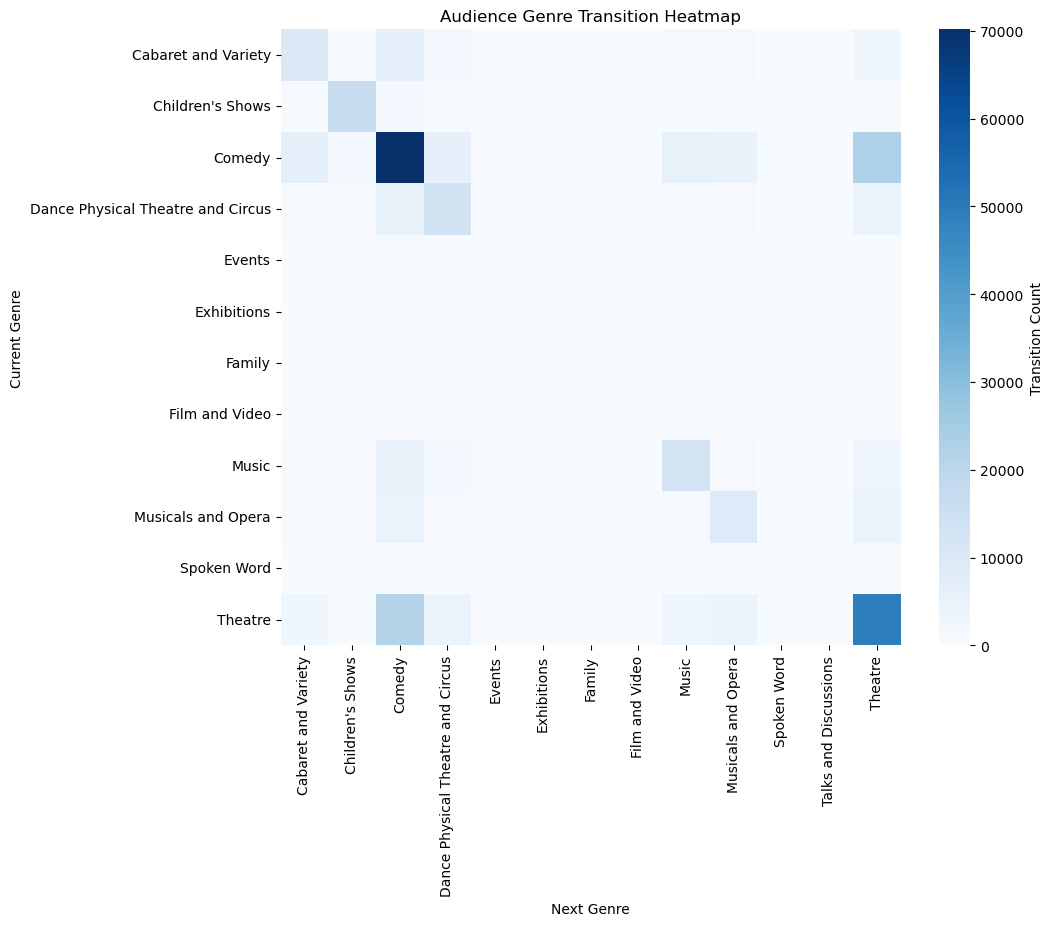

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the dataset
data = pd.read_csv('TravelTechDataset2024Reduced2.csv')
data['transaction_datetime'] = pd.to_datetime(data['transaction_datetime'])

# Sorting by customer and datetime to identify sequences
data = data.sort_values(['customer_id', 'transaction_datetime'])

# Creating a column for the next genre in the sequence for each customer
data['next_genre'] = data.groupby('customer_id')['programme_genre'].shift(-1)

# Dropping rows where there is no next genre (end of sequence for each customer)
data = data.dropna(subset=['next_genre'])

# Counting occurrences of each transition (current genre to next genre)
transition_counts = data.groupby(['programme_genre', 'next_genre']).size().reset_index(name='count')

# Pivoting the data to create a matrix suitable for a heatmap
heatmap_data = transition_counts.pivot(index='programme_genre', columns='next_genre', values='count').fillna(0)

# Creating the heatmap with a lighter background and without annotations
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=False, cmap="Blues", cbar_kws={'label': 'Transition Count'}, vmin=0, vmax=heatmap_data.values.max()/2)
plt.title("Audience Genre Transition Heatmap")
plt.xlabel("Next Genre")
plt.ylabel("Current Genre")
plt.show()


**Output**

The heatmap clearly illustrates frequent genre transitions, with notable patterns such as:

"Comedy" frequently serves as a transition genre, possibly indicating its role as a lighthearted break between events.
High transition counts to "Theatre" as a closing genre, which might suggest a preference for more immersive, reflective experiences at the end of the day.

**Insight**

A heatmap was chosen for visualizing common pathways between genres, as it can clearly show the intensity of transitions from one genre to another in a straightforward, grid-like format. Each cell in the heatmap represents the frequency of transitions from one genre to another, with color intensity indicating the number of transitions. This approach provides a clear, at-a-glance understanding of the most common pathways.

This visualization reveals insights into how attendees structure their festival journey, helping organizers create event clusters or recommend schedules that align with these emotional pathways. By catering to popular genre transitions, the festival can enhance attendee satisfaction and provide a more cohesive festival experience.

## 2. Ticket Type Popularity by Broad Sub-Genre (Music) and Audience Demographics

**Background**

In a festival setting as diverse as the Edinburgh Fringe, attendees’ choices in ticket types and preferred sub-genres contribute to their unique “emotional arc” throughout the day. Each ticket type represents a different level of engagement—discounted or accessible tickets may signify casual interest, while premium options reflect a deeper commitment to the experiences. By analyzing these preferences across local and tourist demographics, we can better understand how different audience groups experience the festival.

**Motivation**

To craft an optimal festival experience, it's essential to understand the preferences and emotional expectations of different audience segments. This visualization reveals how demographic groups (locals vs. tourists) gravitate toward specific sub-genres and ticket types. These insights help organizers design event clusters and ticketing models that support varied engagement levels, creating pathways for attendees to experience a cohesive, emotionally resonant journey through music events at the festival.

**Process**

Inspecting Unique Sub-Genres in the Dataset:

Loading the data and filtering it to include only entries where the programme_genre is "Music." Then, checking the unique values in the subgenre1 column.

In [48]:
# Loading dataset and filtering necessary columns
data = pd.read_csv('TravelTechDataset2024Reduced2.csv')
data = data[['ticket_type', 'subgenre1', 'programme_genre', 'customer_postcode']].dropna()

# Filtering for only "Music" programme genre
music_data = data[data['programme_genre'].str.strip() == 'Music']

# Displaying unique sub-genres in the "Music" genre
unique_subgenres = music_data['subgenre1'].unique()
print("Unique sub-genres under the 'Music' genre:", unique_subgenres)


Unique sub-genres under the 'Music' genre: ['Jazz' 'Event' 'Cabaret' 'A cappella' 'Theatre' 'Family-friendly' 'Folk'
 'Pop' 'Classical' 'Acoustic' 'Tribute' 'Choral' 'Vocal' 'Blues' 'Soul'
 'Funk' 'Immersive' 'Multimedia' 'Storytelling' 'Live music' 'Game show'
 'Rock' 'Traditional' 'Spoken word' 'Solo show' 'Historical' 'Swing'
 'Dance' 'Walk' 'Comedy' 'Music' 'Flamenco' 'World music' 'Contemporary'
 'Science and technology' 'Live Music' 'New writing' 'Experimental'
 'Musical theatre' 'Poetry' "Children's show" 'Disabled-led'
 'Musical Comedy' 'Opera' 'Alternative comedy']


After inspecting the unique sub-genres, I created a dictionary (subgenre_map) to group similar sub-genres. For example:

If the output includes "Classical," "Choral," and "Vocal," I am grouping these as "Classical/Choral."
If the output includes "Jazz" and "Blues," group these as "Jazz/Blues."

I continued this process to combine related genres.

Data Loading and Filtering:

The dataset is loaded, and only relevant columns are retained (ticket_type, subgenre1, programme_genre, customer_postcode).
Rows with missing values are dropped, and only rows where programme_genre is "Music" are kept, focusing the analysis on music events.

Broad Sub-Genre Mapping:

A dictionary (subgenre_map) maps specific music sub-genres to broader categories (e.g., "Classical," "Pop/Rock").
This mapping is applied to create a new column, broad_subgenre, that categorizes sub-genres for easier analysis.

Ticket Type Grouping:

Another dictionary (ticket_type_map) consolidates various ticket types into general categories like "Discounted Tickets," "General Admission," and "VIP or Premium."
This mapping is used to create a combined_ticket_type column, grouping ticket types to simplify the visualization.

Audience Demographic Classification:

The audience_type column is created by categorizing customers as "Local" if their postcode starts with "EH" (Edinburgh area) or "Tourist" otherwise.

Data Aggregation:

The data is aggregated to count the number of tickets sold per broad sub-genre, audience type, and combined ticket type, providing a breakdown of ticket popularity by demographic and sub-genre.

Visualization with Plotly:

A stacked bar chart is created with Plotly, showing ticket type distribution for each broad sub-genre, split by audience type (Local and Tourist) using facet_col. Custom colours and labels are applied for clarity, and the chart is displayed, providing insights into ticket type preferences by audience demographic and genre.

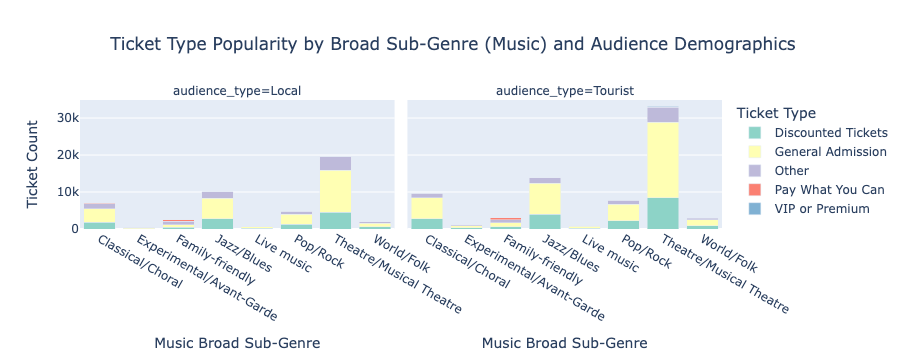

In [49]:
# Defining a mapping for broader sub-genre categories
subgenre_map = {
    'Live music': 'Live music',
    'Classical': 'Classical/Choral',
    'Choral': 'Classical/Choral',
    'Vocal': 'Classical/Choral',
    'Music': 'Classical/Choral',
    'A cappella': 'Classical/Choral',
    'Acoustic':'Classical/Choral',
    'Pop': 'Pop/Rock',
    'Rock': 'Pop/Rock',
    'Indie': 'Pop/Rock',
    'Funk': 'Pop/Rock',
    'Contemporary': 'Pop/Rock',
    'Dance': 'Pop/Rock',
    'Cabaret': 'Jazz/Blues',
    'Jazz': 'Jazz/Blues',
    'Blues': 'Jazz/Blues',
    'Soul': 'Jazz/Blues',
    'Swing': 'Jazz/Blues',
    'Tribute': 'World/Folk',
    'Flamenco': 'World/Folk',
    'World music': 'World/Folk',
    'Folk': 'World/Folk',
    'Disabled-led': 'Experimental/Avant-Garde',
    'Experimental': 'Experimental/Avant-Garde',
    'Poetry': 'Experimental/Avant-Garde',
    'Avant-Garde': 'Experimental/Avant-Garde',
    'Musical theatre': 'Theatre/Musical Theatre',
    'Opera': 'Theatre/Musical Theatre',
    'Musical Comedy': 'Theatre/Musical Theatre',
    'Alternative comedy': 'Theatre/Musical Theatre',
    'Theatre': 'Theatre/Musical Theatre',
    "Children's show": 'Family-friendly',
    'Family-friendly': 'Family-friendly',
    
}

# Applying mapping to create broader sub-genre categories
data['broad_subgenre'] = data['subgenre1'].map(subgenre_map)

# Defining a mapping for ticket type grouping
ticket_type_map = {
    'Concession': 'Discounted Tickets',
    'Student': 'Discounted Tickets',
    'Senior Citizen': 'Discounted Tickets',
    'Fringe Friend': 'Discounted Tickets',
    'Full Price': 'General Admission',
    'General Admission': 'General Admission',
    'VIP': 'VIP or Premium',
    'Sirloin Seat': 'VIP or Premium',
    'Pay What You Can - £5.00': 'Pay What You Can',
    'Pay What You Can - £10.00': 'Pay What You Can',
    'Family Ticket': 'Other',
    'Under 16 Special': 'Other',
}

# Applying mapping to create combined ticket types
data['combined_ticket_type'] = data['ticket_type'].map(ticket_type_map).fillna('Other')

# Defining audience demographic as 'Local' or 'Tourist' based on postcode
data['audience_type'] = data['customer_postcode'].apply(lambda x: 'Local' if x.startswith('EH') else 'Tourist')

# Aggregating the data to get ticket counts by broad sub-genre and demographic
agg_data = data.groupby(['broad_subgenre', 'audience_type', 'combined_ticket_type']).size().reset_index(name='count')


import plotly.express as px

# Creating the stacked bar chart
fig = px.bar(
    agg_data,
    x='broad_subgenre',
    y='count',
    color='combined_ticket_type',
    facet_col='audience_type',  # Separate charts for Local and Tourist audiences
    title='Ticket Type Popularity by Broad Sub-Genre (Music) and Audience Demographics',
    labels={
        'broad_subgenre': 'Music Broad Sub-Genre',
        'count': 'Ticket Count',
        'combined_ticket_type': 'Ticket Type'
    },
    category_orders={'broad_subgenre': agg_data['broad_subgenre'].unique()},
    color_discrete_sequence=px.colors.qualitative.Set3  # Setting colour scheme for readability
)

# Customizing the layout
fig.update_layout(
    barmode='stack',
    xaxis_title='Music Broad Sub-Genre',
    yaxis_title='Ticket Count',
    legend_title='Ticket Type',
    title_x=0.5,
)

fig.show()


**Output**

Local Audience: Locals show a strong preference for "Discounted Tickets" and "General Admission" across popular sub-genres such as "Jazz/Blues" and "Theatre/Musical Theatre." This trend suggests that locals may be more cost-conscious, favoring accessible options that allow them to explore a variety of experiences without a significant financial commitment.

Tourist Audience: Tourists, on the other hand, sometimes lean towards "General Admission" and "VIP or Premium" ticket types, especially in sub-genres like "Jazz/Blues" and "World/Folk." This pattern implies that tourists are more inclined to invest in premium experiences, possibly looking for unique or immersive encounters that enhance their festival experience.

Sub-Genre Trends: Sub-genres like "Family-friendly" and "Experimental/Avant-Garde" show a diverse mix of ticket types, catering to both locals with discounted options and tourists with VIP preferences. This indicates these genres' broad appeal, attracting both price-sensitive attendees and those willing to pay for premium experiences.

**Insight**

Emotional Pathways: Recognizing that locals prefer accessible ticket types and tourists lean towards premium experiences in specific genres can guide organizers in designing event pathways that align with these emotional expectations. For example, organizing high-energy, affordable experiences for locals and creating more exclusive, immersive options for tourists.

Curated Experiences: The insights can be used to optimize ticket offerings and enhance the overall festival experience. By clustering affordable events in popular genres for locals and offering VIP or bundled experiences in tourist-preferred genres, organizers can create curated pathways that align with audience expectations for engagement, cost, and immersion, enhancing the emotional journey for both locals and tourists.


## 3. Engagement Timeline of "High Energy" or "Immersive Experiences"

**Background**

At a dynamic festival like the Edinburgh Fringe, audience energy levels fluctuate throughout the day as attendees move through a variety of experiences. Immersive and high-energy events play a key role in shaping the festival-goers' emotional journey, providing moments of heightened engagement that contribute to their overall experience arc. Identifying when audiences are most responsive to these events allows organizers to strategically position immersive experiences to enhance the festival’s emotional rhythm.

**Motivation**

The goal of this exploration is to understand the ideal times of day for immersive, high-energy events, contributing to the broader objective of mapping the “Emotional Arc". By pinpointing peak engagement periods, organizers can design a cohesive narrative flow, creating a balanced emotional journey that aligns with natural audience energy levels, and ensuring that high-impact events occur at optimal times.

**Process**

Data Loading and Filtering:

The dataset is loaded, and a specific list of "high-energy" and "immersive" sub-genres (immersive_genres) is defined, focusing on genres like "Hip Hop," "Pop," "Rock," and "Musical Comedy." The data is filtered to include only rows where subgenre1 matches these immersive genres.

Datetime Parsing and Extraction:

The performance_datetime column is converted to datetime format. An hour column is created to capture the hour of each performance, allowing for analysis of hourly attendance trends.

Hourly Attendance Calculation:

The data is grouped by hour, and the number of performances (attendance counts) is calculated for each hour, creating a summary of how many attendees are engaged at different times of day.

Visualization with Altair:

An area chart is created with Altair to display the engagement timeline.
A gradient fill (light to dark blue) is used for visual appeal, and the chart's opacity is adjusted for a smooth look. The x axis shows the hour of the day, while the y axis represents attendance counts. Tooltips are added to show exact attendance numbers on hover.


In [50]:
import altair as alt

# Loading the dataset
data = pd.read_csv('TravelTechDataset2024Reduced2.csv')

# Defining the list of sub-genres that could be considered "high-energy"
immersive_genres = ['Hip Hop', 'Pop', 'Rock', 'Musical Comedy']

# Filtering the data where 'subgenre1' is in the list of immersive genres
immersive_data = data[data['subgenre1'].isin(immersive_genres)].copy()

# Parsing datetime columns to get the hour of the day for analysis
immersive_data['performance_datetime'] = pd.to_datetime(immersive_data['performance_datetime'])
immersive_data['hour'] = immersive_data['performance_datetime'].dt.hour  # Extract the hour

# Calculating hourly attendance counts
hourly_attendance = immersive_data.groupby('hour').size().reset_index(name='attendance')

# Creating the Altair area chart
attendance_chart = alt.Chart(hourly_attendance).mark_area(
    line={'color': 'darkblue'},
    color=alt.Gradient(
        gradient='linear',
        stops=[alt.GradientStop(color='lightblue', offset=0),
               alt.GradientStop(color='darkblue', offset=1)],
        x1=1, x2=1, y1=1, y2=0
    ),
    opacity=0.7
).encode(
    x=alt.X('hour:O', title='Hour of the Day', axis=alt.Axis(labelAngle=0)),
    y=alt.Y('attendance:Q', title='Attendance Count'),
    tooltip=['hour', 'attendance']
).properties(
    width=600,
    height=300,
    title="Engagement Timeline of 'High-Energy' Experiences"
)

attendance_chart


alt.Chart(...)

**Output:**

The updated timeline visualization displays the hourly attendance count for immersive or high-energy events throughout the day. The x-axis represents the hour of the day, ranging from 11 AM to 11 PM, while the y-axis shows the attendance count, with peaks and dips clearly visible.

The chart reveals notable peaks in audience engagement, especially around the early evening hours:

Peak at 6 PM: This is the highest attendance period, indicating a strong preference for immersive experiences in the early evening.

Secondary peak at 8 PM: A slightly lower but still significant peak, showing continued interest in high-energy events later in the evening.

Steady increase from 4 PM onwards: Attendance gradually increases as the day progresses, reaching a climax in the evening before tapering off.

**Insight:**
This timeline provides valuable insights into optimal scheduling for immersive experiences:

Prime Hours for Engagement: The early evening (6 PM) appears to be the most appealing time for audiences to attend high-energy events, followed closely by 8 PM. Organizers can strategically schedule immersive experiences around these times to maximize attendance and audience engagement.

Audience Energy Rhythm: The trend indicates a gradual build-up in engagement from mid-afternoon to evening, suggesting that audiences prefer to transition into high-energy activities later in the day.

Event Timing Optimization: Planners can use this information to avoid scheduling immersive events during low-attendance hours (e.g., early afternoon), reserving these time slots for other types of events.

## Discussion

This exploration has provided meaningful insights into how audiences interact with different events, ticket types, and sub-genres at the festival. The observations and insights gained from each of the three visualizations are interlinked and build a unique understanding of audience behavior and engagement, contributing to a comprehensive view of the festival experience.

**Discoveries and Their Significance**

**1. Emotional Path Mapping (Genre Transition Heatmap):**

Attendees often transition between high-energy events like comedy and music, suggesting a pattern of alternating between genres that offer different emotional tones.

This suggests that attendees may be curating their own “emotional arc” by balancing intense experiences with lighter, more varied genres. Understanding this can help organizers design event schedules that complement natural audience preferences for pacing their day.

This insight is relevant for enhancing audience satisfaction by structuring events that allow attendees to create personalized, fulfilling experiences.

**2. Ticket Type Popularity by Sub-Genre and Audience Demographics (Stacked Bar Chart):**

Local audiences tend to prefer general admission or discounted tickets, while tourists are more inclined towards premium or VIP tickets. Additionally, sub-genres like Jazz/Blues and Classical/Choral are popular with both locals and tourists, but other sub-genres show stronger preferences by audience type.

These patterns reveal underlying social and economic factors that affect accessibility and inclusion at the festival. By recognizing which sub-genres resonate with different demographics and ticket types, festival organizers can tailor pricing models and outreach to accommodate diverse audiences.

This analysis highlights how ticket pricing and availability influence attendance, raising considerations for accessibility and inclusivity in event planning.

**3. Engagement Timeline of High-Energy Experiences (Hourly Attendance Area Chart):**

The engagement timeline shows clear peaks during midday and early evening, indicating optimal times for high-energy, immersive experiences. This timeline suggests that audiences may seek peak engagement and immersive experiences at specific times of day.

This information is valuable for scheduling high-energy performances to coincide with audience energy levels, maximizing impact and enjoyment.

By aligning event schedules with natural audience engagement cycles, organizers can enhance the immersive experience, leading to a more satisfying festival atmosphere.

**Overall Reflections and Hypotheses**

These discoveries collectively reveal meaningful patterns about how festival-goers interact with various genres, ticket types, and event timings to create a unique emotional journey. The data suggests that audiences are not only driven by genre preferences but also consider ticket type and event timing to curate a balanced experience. This reinforces the festival’s role in providing not only entertainment but also a structured environment where audiences can explore diverse cultural offerings.

**Hypotheses for Further Exploration**

Genre Preferences by Time of Day: Audiences may prefer specific genres at particular times (e.g., immersive experiences in the evening). Further analysis could examine if certain genres perform better at certain times.

Socioeconomic Influence on Ticket Type Preferences: Differences in ticket type preferences between locals and tourists suggest socioeconomic factors influence ticket choices. Exploring this could reveal insights for more inclusive ticketing strategies.

Impact of Genre Transitions on Audience Satisfaction: The genre transitions suggest audiences prefer alternating experiences. Testing whether curated schedules with intentional genre transitions enhance satisfaction could help optimize event scheduling.

Something I really wanted to explore but couldn’t, due to the time and scope constraints of this assignment, was to look into Ticket Type and Mood Preferences. Certain ticket types, such as VIP or premium, may be more popular for music events with mellow or immersive moods, while general admission may align more with high-energy genres. Further exploration using sentiment analysis could examine if these associations are consistent across different sub-genres or if they vary by event size.

Overall, these reflections and hypotheses provide a framework for future data-driven strategies that can shape a festival experience tailored to diverse audience needs, ensuring accessibility, engagement, and enjoyment for all attendees.

## Use of AI

I used AI breifly once to check the reason for a 'Warning' message that popped-up on Jupyter. I resolved it based on the suggestions I received.